# 线性回归

- 回归(regression)：建模自变量与因变量之间关系，表示输入与输出关系。通常执行预测(prediction)任务。如预测价格、预测需求量

## 线性回归基本元素
- training data, or training set
- 每行数据(sample/data point/data instance)
- 预测目标（如预测房价）(label/target)
- 预测所依据的自变量（如面积、房龄等）(feature/covariate)
- 偏置量是当所有参数为0时，预测值应该是多少(bias/offset/intercept)，若没有会限制模型表达能力
- 权重为自变量对目标变量的影响程度(weight)

### 线性模型
- target为房屋价格
- feature为房龄和面积
- weight为$\omega_{area}$和$\omega_{age}$
- bias为$b$
  $$ price=\omega_{area} \cdot area+\omega_{age} \cdot age+b$$
- 这个模型是输入特征的一个仿射变换(affine transformation)，其特点是通过weight和对feature进行线性变换(linear transformation)，并通过bias来进行平移(translation)
  
#### 也就是说
在机器学习中，预测结果$\hat{y}$表示为：
$$ \hat{y}=\omega_1 x_1+\omega_2 x_2+\cdots+\omega_n x_n+b=\omega^\top x+b $$

当$\mathbf{X}$ 每一行是一个sample，每一列是一个feature时，即 $\mathbf{X}=\begin{bmatrix}x_1^T\\x_2^T\\\vdots\\x_n^\top\end{bmatrix}$时，
$$\hat{y}=\mathbf{X}\mathbf{\omega}+b$$

- 这个过程中求和使用broadcast  
- 当给定training data feature $\mathbf{X}$, label $y$ 时，线性回归的target是找到一组weight $\mathbf{\omega}$和bias $b$，这组数据能使新sample的预测结果尽量接近真实值
- 在寻找model parameters($\omega$和$b$)之前，我们还需要
  1. 模型质量的度量方式
  2. 能更新模型的方法，以达到更高模型质量

### 损失函数(loss function)
- 量化实际值与预测值的差距
- 通常选用正数作为损失，越小越好
- 回归问题中最常用的时平方误差函数
  $$ l^{(i)}(\omega,b)=\frac{1}{2}(y^{(i)}-\hat{y}^{(i)})^2 $$
- 以n个样本的损失均值作为损失函数
  $$ L(\omega,b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(\omega,b) = \frac{1}{n}\sum_{i=1}^n (y^{(i)}-\omega^\top x^{(i)}-b)^2$$
- 我们的目的是寻找一组parameters $\omega^*,b^*$，使得损失函数最小化
  $$ \omega^*,b^*=\arg\min_{\omega,b} L(\omega,b) $$

### 解析解
- 线性回归的解可以用一个公式表达出来，称为解析解(analytical solution)
- 将$b$ 合并到$\omega$中，即$\hat{y}$的增广（augment matrix），具体过程为：
  1. 合并
  $$
  \mathbf{X}=\begin{bmatrix}
  \mathbf{X}&|&1
  \end{bmatrix}
  =\begin{bmatrix}
  X_1&|&1\\
  X_2&|&1\\
  \vdots&|&\vdots\\
  X_n&|&1
  \end{bmatrix}, 
  \omega=\begin{bmatrix}
  \omega_1\\
  \omega_2\\
  \vdots\\
  \omega_n\\
  \hline\\
  b
  \end{bmatrix}
  \Rightarrow
  \hat{y}=\mathbf{X}\cdot \omega=\begin{bmatrix}
  X_1 \omega\\
  X_2 \omega\\
  \vdots\\
  X_n \omega
  \end{bmatrix}\\
  $$
  2. 定义损失函数
  $$
  \Rightarrow
  L=\|\hat{y}-y\|^2=(\mathbf{X}\omega-y)^\top (\mathbf{X}\omega-y)=\omega^\top \mathbf{X}^\top \mathbf{X}\omega-\omega^\top \mathbf{X}^\top y-y^\top \mathbf{X}\omega+y^\top y\\
  
  $$
  3. 求导：根据ch2:4.calculus.ipynb中梯度内容可得
   $$
   \begin{aligned}
   \Rightarrow
  \frac{\partial L}{\partial \omega}&=\frac{\partial (\omega^\top \mathbf{X}^\top \mathbf{X}\omega)}{\partial \omega}-\frac{\partial (\omega^\top \mathbf{X}^\top y)}{\partial \omega}-\frac{\partial (y^\top \mathbf{X}\omega)}{\partial \omega}-\frac{\partial (y^\top y)}{\partial \omega}\\
  &=2\mathbf{X}^\top \mathbf{X}\omega-\mathbf{X}^\top y-\mathbf{X}^\top y=2\mathbf{X}^\top \mathbf{X}\omega-2\mathbf{X}^\top y
  \end{aligned}
  $$

  4. 求解loss function最小值：
  $$
  \frac{\partial L}{\partial \omega}=0\Rightarrow 2\mathbf{X}^\top \mathbf{X}\omega-2\mathbf{X}^\top y=0
  \Rightarrow \mathbf{X}^\top \mathbf{X}\omega= \mathbf{X}^\top y$$
    - 若$\mathbf{X}^\top \mathbf{X}$可逆
  $$\Rightarrow \omega^*=(X^\top X)^{-1}X^Ty$$
- 并不是所有问题都有解析解


### 随机梯度下降
- 即使没有解析解，也能有效训练模型
- 梯度下降(gradient descent)：计算loss function对于model parameters的导数，并更新参数，但可能非常慢，因为需要遍历整个数据集
- 因此在需要更新时随机抽取一批样本，称为小批量随机梯度下降(minibatch stochastic gradient descent)。即在每次迭代中随机抽样固定数量小批量$\beta$，计算小样本梯度，最后将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减去。
  $$(\omega,b)\leftarrow(\omega,b)-\frac{\eta}{|\beta|}\sum_{i\in\beta} \partial_{(\omega,b)} l^{(i)}(\omega,b)$$

- 总结
  - loss function：平方损失
  - 算法步骤：
    1. 初始化模型参数的值，如随机初始化
    2. 从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代。
  - 对于平方损失和仿射变换，即为如下形式
    $$
    \begin{aligned}
    \omega &\leftarrow \omega-\frac{\eta}{|\beta|} \sum_{i\in\beta} \partial_\omega l^{(i)}(\omega,b)
    =\omega-\frac{\eta}{|\beta|} \sum_{i\in\beta}x^{(i)}(\omega^\top x^{(i)}+b-y^{(i)}) \\
    b &\leftarrow b-\frac{\eta}{|\beta|} \sum_{i\in\beta}\partial_b l^{(i)}(\omega,b)=b-\frac{\eta}{|\beta|} \sum_{i\in\beta} (\omega^\top x^{(i)}+b-y^{(i)})
    \end{aligned}
    $$
  - 其中$\omega$和$x$都是向量
  - $|\beta|$是小批量样本数(batch size), $\eta$是学习率(learning rate)，通常手动指定。这种手动指定的参数叫超参数(hyperparameter)，通过在验证数据集(validation dataset)上得到的训练迭代结果调整参数(hyperparameter tuning)
  - 训练结束后得到$\hat{\omega},\hat{b}$，但是这些估计值不会使loss function最小化，因为是向最小值缓慢收敛，而不是在有限步数内精确得到最小值
  - linear regression恰好只有一个最小值，但深度神经网络等复杂模型往往有多个最小值，所有挑战为找到一组参数，能在没见过的数据上实现较低损失，这一挑战即为泛化(generalization)

### 用模型进行预测
给定特征估计目标的过程称为预测(prediction)或推断(inference)

## 矢量化加速
- 利用线性代数库，而不是for循环
- 对比for循环和矢量化用时的运行速度

In [ ]:
import math
import time
import numpy as np
import torch
import sys
import os
sys.path.append('..')

from utils import *
%matplotlib inline

n=10000
a=torch.ones([n])
b=torch.ones([n])



tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [ ]:
# for循环
c=torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]

f'{timer.stop():.5f} seconds'

('0.07396 seconds', tensor([2., 2., 2.,  ..., 2., 2., 2.]))

In [ ]:
# 重载的+明显更快
timer.start()
d=a+b
f'{timer.stop():.5f} seconds'

'0.00057 seconds'

## 正态分布与平方损失
- 通过噪声分布的假设解读平方损失目标函数
- 正态分布(normal distribution)：也称高斯分布(Gaussian distribution)，即为随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差为$\sigma$），其正态分布概率密度函数为：
  $$p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$

In [11]:
# 正态分布函数
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5*((x-mu)/sigma)**2)

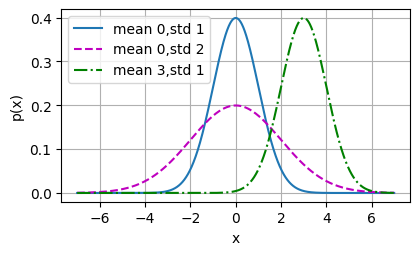

In [ ]:
# 可视化正态分布
x=np.arange(-7,7,0.01)
# (均值,标准差)
params=[(0,1),(0,2),(3,1)]
plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel="x",ylabel="p(x)",figsize=(4.5,2.5),legend=[f'mean {mu},std {sigma}' for mu,sigma in params])

- 改变均值$\mu$会导致沿x轴的偏移，增加方差$\sigma$会导致数据分布更分散
- 均方误差损失函数可用于线性回归的原因：我们假设了观测中包含噪声，其中噪声服从正态分布。噪声正态分布如下式：
  $$y=\omega^\top x+b+\epsilon, \epsilon\sim \mathcal{N}(0,\sigma^2)$$
  - 即，y的均值为$\omega^\top x+b$，方差为$\sigma^2$，记为$y|x \sim \mathcal{N}(\omega^\top x+b,\sigma^2)$
  - 因此，可写出给定的x观测到特定y的似然(likelihood)：
    $$p(y|x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(y-\omega^\top x-b)^2\right)$$
  - 根据极大似然估计法，参数$\omega$和$b$的最优值是整个数据集的likelihood最大的值
    $$p(y|x)=\prod_{i=1}^n p(y^{(i)}|x^{(i)})$$
  - 通过极大似然估计法选择的估计量称为极大似然估计量，也可以改为最小化负对数似然$-lnp(y|x)$，则
    $$-lnp(y|x)=\sum_{i=1}^n \frac{1}{2} ln(2\pi\sigma^2)+\frac{1}{2\sigma^2}(y^{(i)}-\omega^\top x^{(i)}-b)^2$$
  - 因为第一项与$\omega$和$b$无关，则只需要假设$\sigma$是固定常数即可忽略第一项，且第二项除了常数项$\frac{1}{2\sigma^2}$外，其余部分与之前均方误差一样。由于上式的解不依赖于$\sigma$，因此在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计

## 从线性回归到深度网络
将线性模型看作一个神经网络
### 神经网络图
![线性回归是一个单层的神经网络](/home/user23211/workspace/study_notes/dive_into_deep_learning/chapter3/assets/linear_regression_layer.png)
如图
- 输入为$x_1,x_2,\ldots,x_d$，则输入数（特征维度，feature dimension）为$d$
- 输出为$o_1$，则输出数为1
- 神经网络层数为1，因为只有一个神经元，计算层数不考虑输出层，也可以称作单层神经网络
- 对于线性回归，每个输入与每个输出相连，我们将这种变换叫做全连接层(fully-connected layer)或稠密层(dense layer)

## 练习
1. 假设有一些数据$x_1,x_2,\ldots,x_n \in \mathbb{R}$，找到一个常熟b，使得最小化$\sum_i (x_i-b)^2$。
   1. 找到最优值$b$的解析解
   $$
   \begin{aligned}
    L&=\sum_i (x_i-b)^2 \Rightarrow \frac{dL}{db}=-\sum_i 2(x_i-b)\\
   令\frac{dL}{db}&=0\Rightarrow b=\frac{x_1+x_2+...+x_n}{n}
   \end{aligned}$$
   2. 这个问题及其解与正态分布有什么关系
   
2. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向添加所有值为1的一列来做到这一点）。
   1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
   2. 计算损失对$\omega$的梯度。
   3. 通过将梯度设为0、求解矩阵方程来找到解析解。
   4. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
   
3. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon)=\frac{1}{2}exp(-|\epsilon|)$
   1. 写出模型$-lnP(y|X)$下数据的负对数似然。
   2. 请试着写出解析解。
   3. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

In [13]:
# TODO what the hell is this